   ## Alvin Fajar Permana
   ### 210535614804
   ### S1 Teknik Informatika offering A

In [98]:
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [100]:
df.shape

(768, 9)

In [101]:
df.dropna(inplace=True)


In [102]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [103]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

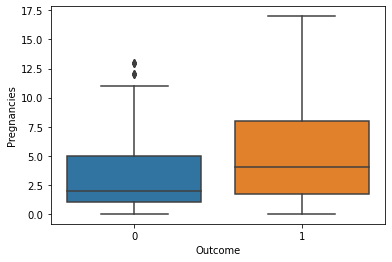

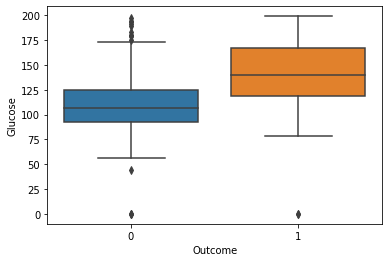

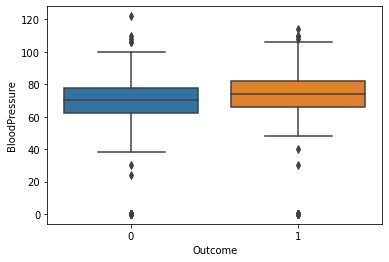

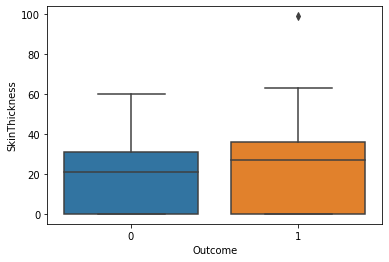

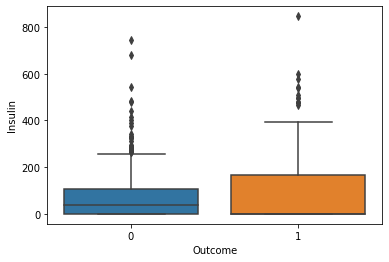

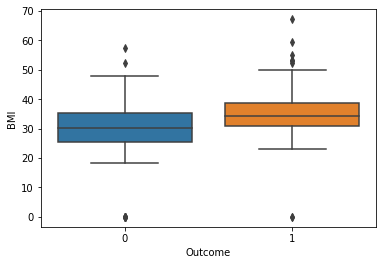

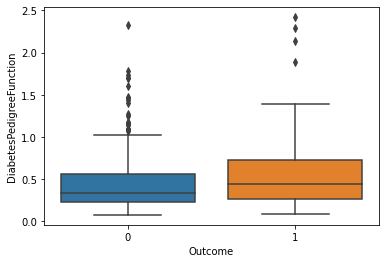

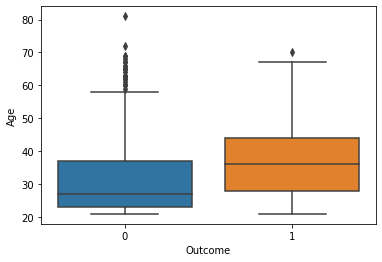

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to be plotted
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = ['Outcome']
# Loop over each feature and create boxplot
for feature in features:
    sns.boxplot(x="Outcome", y=feature, data=df)
    plt.show()


In [105]:
df[target].value_counts()

Outcome
0          500
1          268
dtype: int64

In [106]:
y=target
y

['Outcome']

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Outcome', axis=1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Outcome'], test_size=0.2, random_state=42)
X_train

array([[-0.54791859, -1.15469351, -3.57259724, ..., -4.06047387,
        -0.50700636, -1.04154944],
       [ 1.53084665, -0.27837344,  0.66661825, ..., -0.48135115,
         2.44666971,  1.4259954 ],
       [-0.84488505,  0.56664949, -1.19450074, ..., -0.41789153,
         0.55003518, -0.95646168],
       ...,
       [ 1.82781311, -0.62264204,  0.87340925, ...,  1.72704372,
         2.00573238,  0.40494237],
       [-1.14185152,  0.62924378, -3.57259724, ...,  1.32090213,
        -0.8059981 , -0.36084741],
       [-1.14185152,  0.12848945,  1.39038675, ..., -1.20479085,
        -0.63385134, -1.04154944]])

In [108]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc #print accuracy array for eack k

array([0.61688312, 0.65584416, 0.7012987 , 0.69480519, 0.68831169,
       0.7012987 , 0.68181818, 0.68831169, 0.68181818])

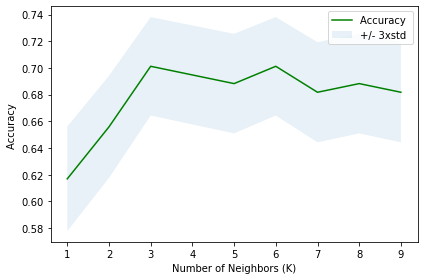

Akurasi terbaik adalah 0.7012987012987013 dengan k= 3


In [109]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "Akurasi terbaik adalah", mean_acc.max(), "dengan k=", mean_acc.argmax()+1) 

In [111]:
# kita akan coba dengan manual k=3
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Outcome', axis=1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Outcome'], test_size=0.2, random_state=42)

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7012987012987013


In [14]:
# Decision tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)


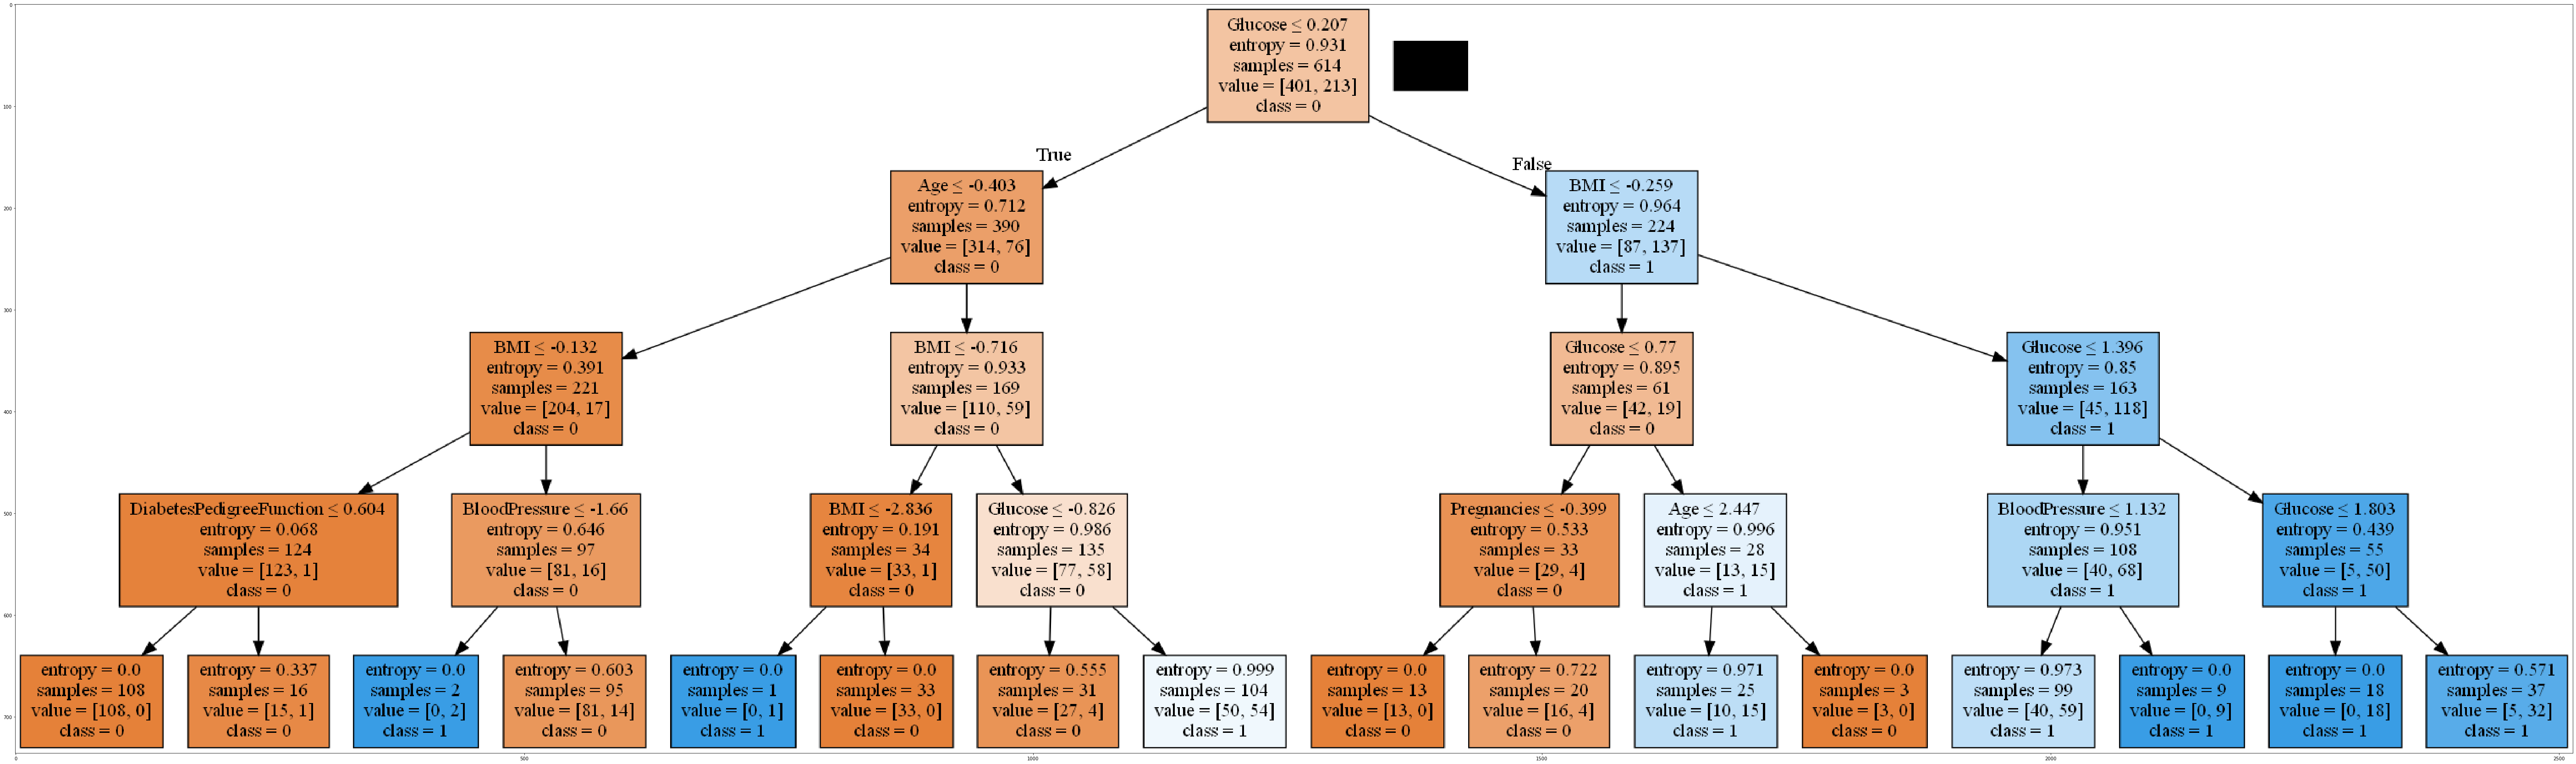

In [16]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:8]
targetNames = df["Outcome"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train).astype(str), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on test set
y_pred = dt.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7467532467532467


In [18]:
# Support Vector Machine

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'sigmoid']}

# Create SVM model
svc = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Predict using best parameters
y_pred = grid_search.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  0.7687458349993336
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        99
           1       0.65      0.55      0.59        55

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154



In [95]:
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score

# Train SVM Classifier
clf = svm.SVC(C=1, gamma=0.1, kernel='rbf')
clf.fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])

print("Label 0:")
print("Precision:", precision[0])
print("Recall:", recall[0])
print("F1-score:", f1[0])
print("Support:", support[0])

print("Label 1:")
print("Precision:", precision[1])
print("Recall:", recall[1])
print("F1-score:", f1[1])
print("Support:", support[1])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision_macro:', precision)
print('Recall_macro:', recall)
print('F1 score_macro:', f1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision_weighted:', precision)
print('Recall_weighted:', recall)
print('F1 score_weighted:', f1)

Label 0:
Precision: 0.7685185185185185
Recall: 0.8383838383838383
F1-score: 0.8019323671497585
Support: 99
Label 1:
Precision: 0.6521739130434783
Recall: 0.5454545454545454
F1-score: 0.594059405940594
Support: 55
Accuracy: 0.7337662337662337
Precision_macro: 0.7103462157809983
Recall_macro: 0.6919191919191918
F1 score_macro: 0.6979958865451763
Accuracy: 0.7337662337662337
Precision_weighted: 0.7269668737060041
Recall_weighted: 0.7337662337662337
F1 score_weighted: 0.7276920238607711


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test)

# Evaluate model performance
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Train Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on test set
y_pred = gnb.predict(X_test)

# Evaluate model performance
# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define parameter grid for GridSearchCV
param_grid = {'hidden_layer_sizes': [(10,), (20,), (30,), (10,10), (20,20), (30,30)]}

# Train neural network classifier with GridSearchCV
mlp = MLPClassifier(max_iter=1000, random_state=42)
grid = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Print best parameters and accuracy score
print("Best parameters: ", grid.best_params_)
print("Accuracy score: ", grid.best_score_)

# Make predictions on test set using best model
best_mlp = grid.best_estimator_
y_pred = best_mlp.predict(X_test)

# Evaluate model performance
# Print classification report
print(classification_report(y_test, y_pred))


In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Train neural network classifier with 1 hidden layer containing 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on test set
y_pred = mlp.predict(X_test)

# Evaluate model performance
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



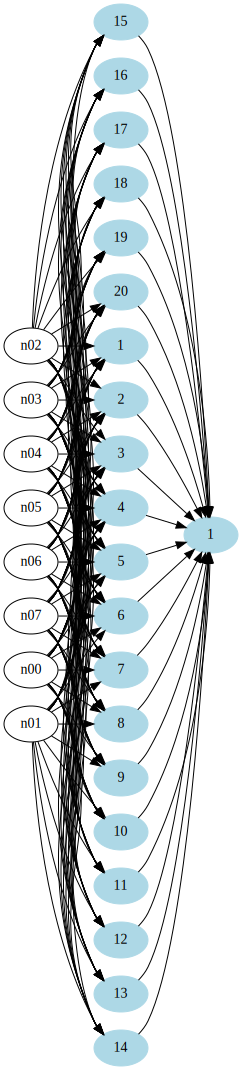

In [28]:
# Visualize neural network with graphviz
from graphviz import Source
layer_sizes = [X.shape[1]] + list(mlp.hidden_layer_sizes) + [mlp.n_outputs_]
layer_sizes = np.array(layer_sizes)

dot_data = "digraph {rankdir=LR;"
for i, size in enumerate(layer_sizes):
    if i == 0:
        continue
    for j in range(size):
        dot_data += "n{}{} [label=\"{}\", style=filled, color=lightblue];\n".format(i, j, j+1)

for i in range(1, len(layer_sizes)):
    for j in range(layer_sizes[i-1]):
        for k in range(layer_sizes[i]):
            dot_data += "n{}{} -> n{}{};\n".format(i-1, j, i, k)

dot_data += "}"

Source(dot_data)

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

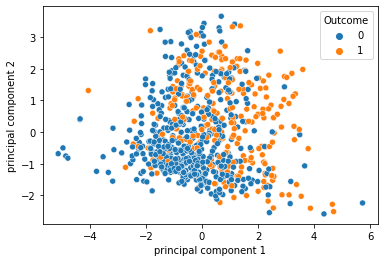

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Perform PCA with n_components = 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Concatenate with target
finalDf = pd.concat([principalDf, df[['Outcome']]], axis=1)

# Visualize result
import seaborn as sns
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Outcome', data=finalDf)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, df['Outcome'], test_size=0.2, random_state=42)

In [31]:
#knn dengan pca
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Menampilkan classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.78      0.73        99
           1       0.49      0.38      0.43        55

    accuracy                           0.64       154
   macro avg       0.59      0.58      0.58       154
weighted avg       0.62      0.64      0.62       154



In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on test set
y_pred = gnb.predict(X_test)

# Print classification report to evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'sigmoid']}

# Create SVM model
svc = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Predict using best parameters
y_pred = grid_search.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


Best parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}
Best score:  0.726389444222311
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        99
           1       0.62      0.47      0.54        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154



In [34]:
# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.79      0.75        99
           1       0.54      0.45      0.50        55

    accuracy                           0.67       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154



In [35]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on test set
y_pred = dt.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66        99
           1       0.43      0.53      0.48        55

    accuracy                           0.58       154
   macro avg       0.57      0.57      0.57       154
weighted avg       0.61      0.58      0.59       154



In [36]:
#neural network pca
# Train neural network classifier with 1 hidden layer containing 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on test set
y_pred = mlp.predict(X_test)

# Evaluate model performance
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        99
           1       0.64      0.51      0.57        55

    accuracy                           0.72       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



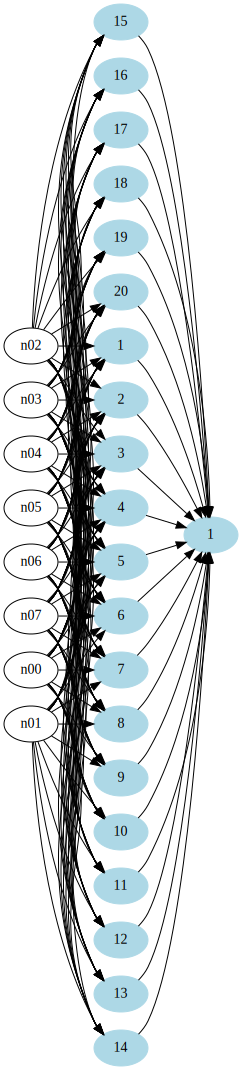

In [37]:
# Visualize neural network with graphviz
from graphviz import Source
layer_sizes = [X.shape[1]] + list(mlp.hidden_layer_sizes) + [mlp.n_outputs_]
layer_sizes = np.array(layer_sizes)

dot_data = "digraph {rankdir=LR;"
for i, size in enumerate(layer_sizes):
    if i == 0:
        continue
    for j in range(size):
        dot_data += "n{}{} [label=\"{}\", style=filled, color=lightblue];\n".format(i, j, j+1)

for i in range(1, len(layer_sizes)):
    for j in range(layer_sizes[i-1]):
        for k in range(layer_sizes[i]):
            dot_data += "n{}{} -> n{}{};\n".format(i-1, j, i, k)

dot_data += "}"

Source(dot_data)

In [38]:
## pembatas

## menggunakan dataset breastcancer


In [39]:
df2 = pd.read_csv('./data.csv')
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
df2.keys()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [41]:
df2.shape


(569, 31)

In [42]:
df2.dropna(inplace=True)

In [43]:
print(df2.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [44]:
print(df2.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [45]:
# Memilih kolom fitur dan kolom target
features2 = df2.drop(['diagnosis'], axis=1)
target2 = df2['diagnosis']

# Mengecek bentuk dari X dan y
print("Shape of features:", features2.shape)
print("Shape of target:", target2.shape)

Shape of features: (569, 30)
Shape of target: (569,)


In [46]:
df2['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

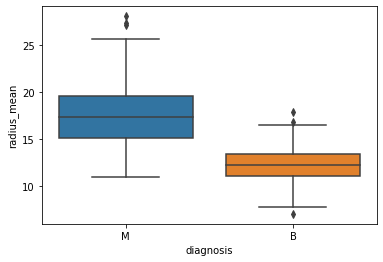

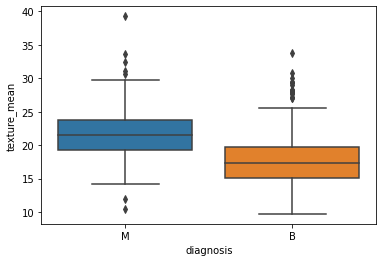

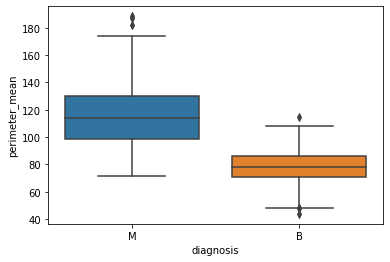

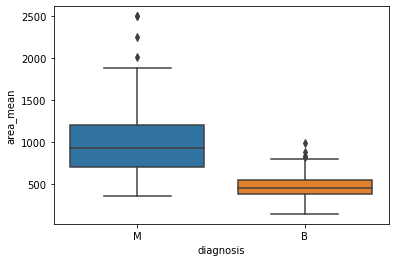

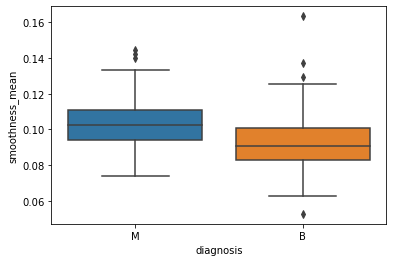

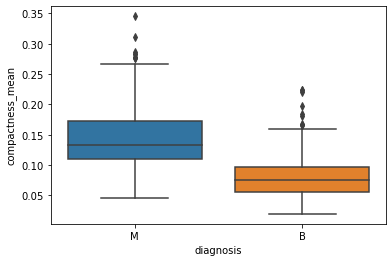

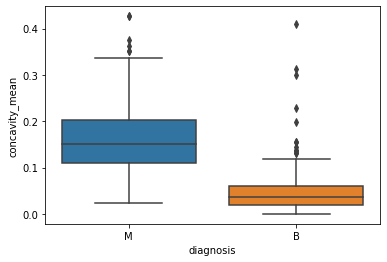

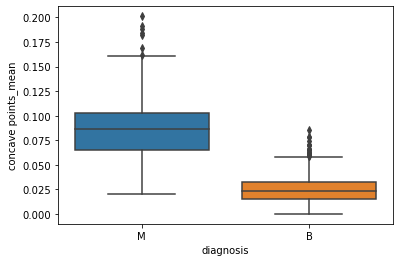

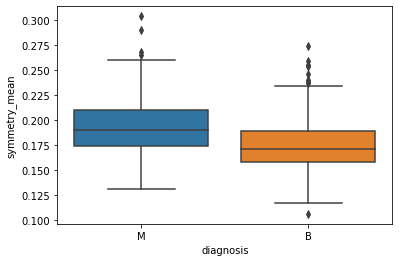

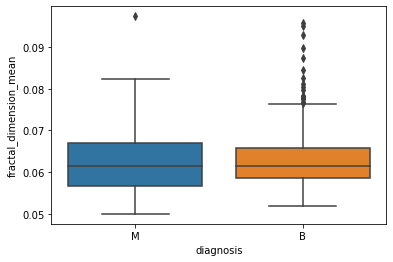

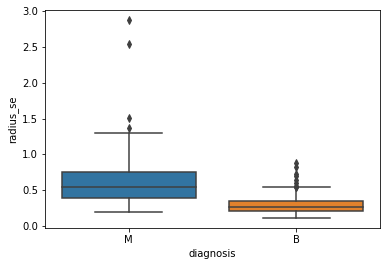

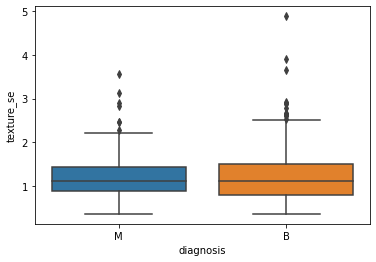

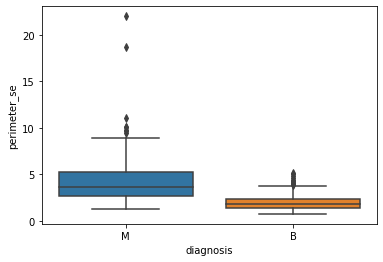

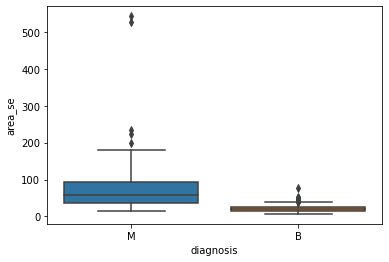

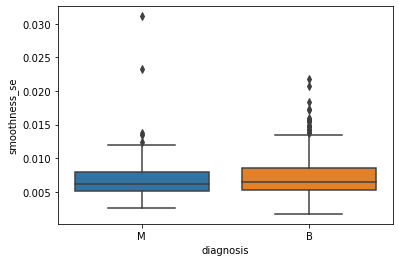

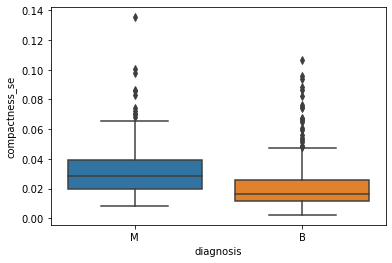

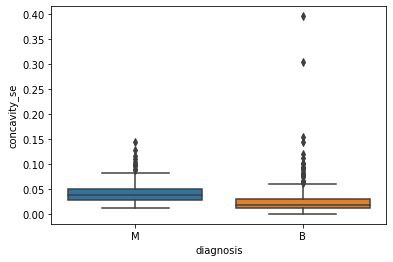

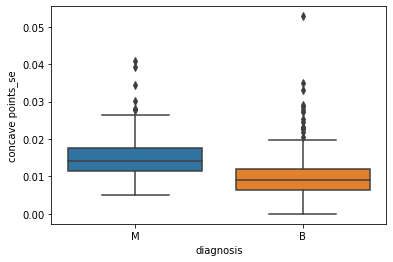

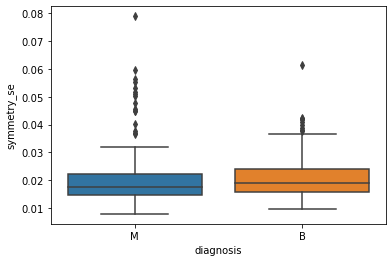

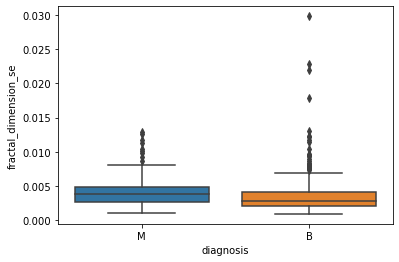

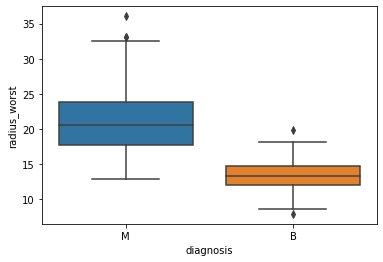

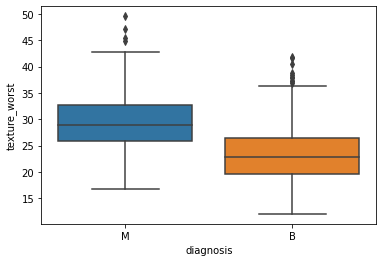

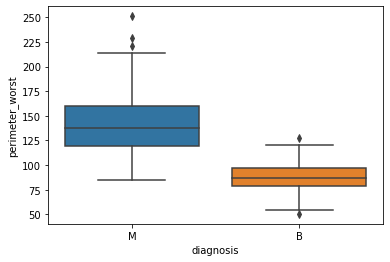

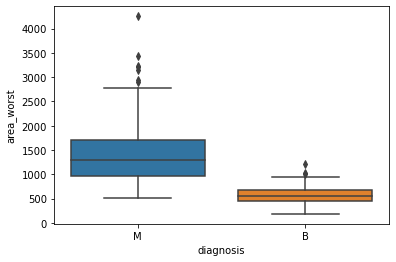

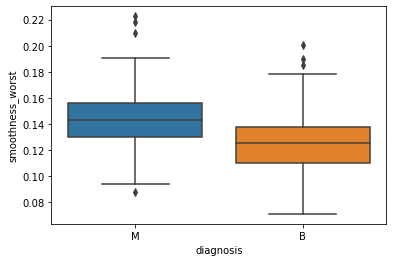

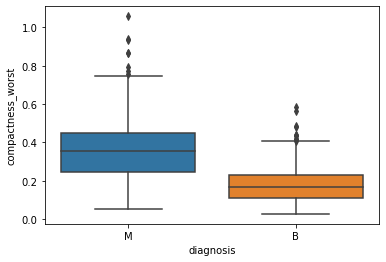

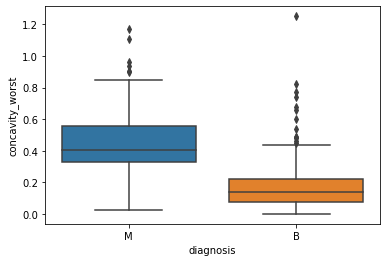

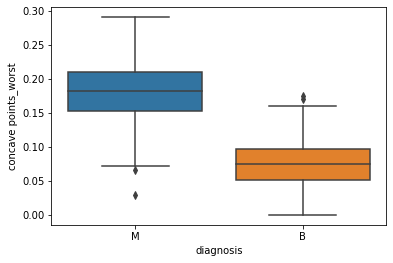

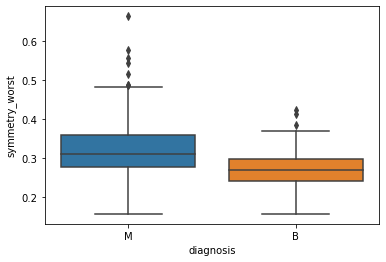

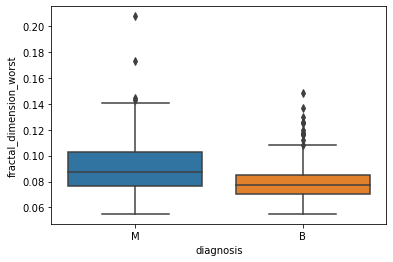

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


# Loop over each feature and create boxplot
for feature in features2:
    sns.boxplot(x="diagnosis", y=feature, data=df2)
    plt.show()


In [50]:
#knn classifier 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df2.drop('diagnosis', axis=1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df2['diagnosis'], test_size=0.2, random_state=42)
X_train

array([[-1.44798723, -0.45602336, -1.36665103, ...,  0.91959172,
         2.14719008,  1.85943247],
       [ 1.97750799,  1.69418666,  2.08961867, ...,  2.6752184 ,
         1.9368786 ,  2.46346488],
       [-1.40708919, -1.26351565, -1.34976305, ..., -0.97048581,
         0.61676962,  0.05287682],
       ...,
       [ 0.04621146, -0.57470379, -0.06874782, ..., -1.23756033,
        -0.71628161, -1.26047806],
       [-0.04183295,  0.07687501, -0.03497186, ...,  1.03683652,
         0.45013821,  1.19444266],
       [-0.5530585 ,  0.28631105, -0.60751564, ..., -0.61357437,
        -0.33448538, -0.84042616]])

In [51]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc #print accuracy array for eack k

array([0.93859649, 0.94736842, 0.94736842, 0.95614035, 0.94736842,
       0.95614035, 0.94736842, 0.95614035, 0.96491228])

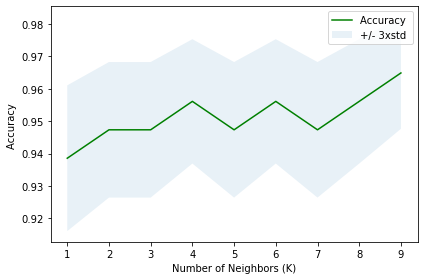

Akurasi terbaik adalah 0.9649122807017544 dengan k= 9


In [52]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "Akurasi terbaik adalah", mean_acc.max(), "dengan k=", mean_acc.argmax()+1) 

In [53]:
# kita akan coba dengan manual k=3
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9473684210526315


In [54]:
# kita akan coba dengan manual k=9
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9649122807017544


In [55]:
# Decision tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)


In [57]:
df2.columns[1:31]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

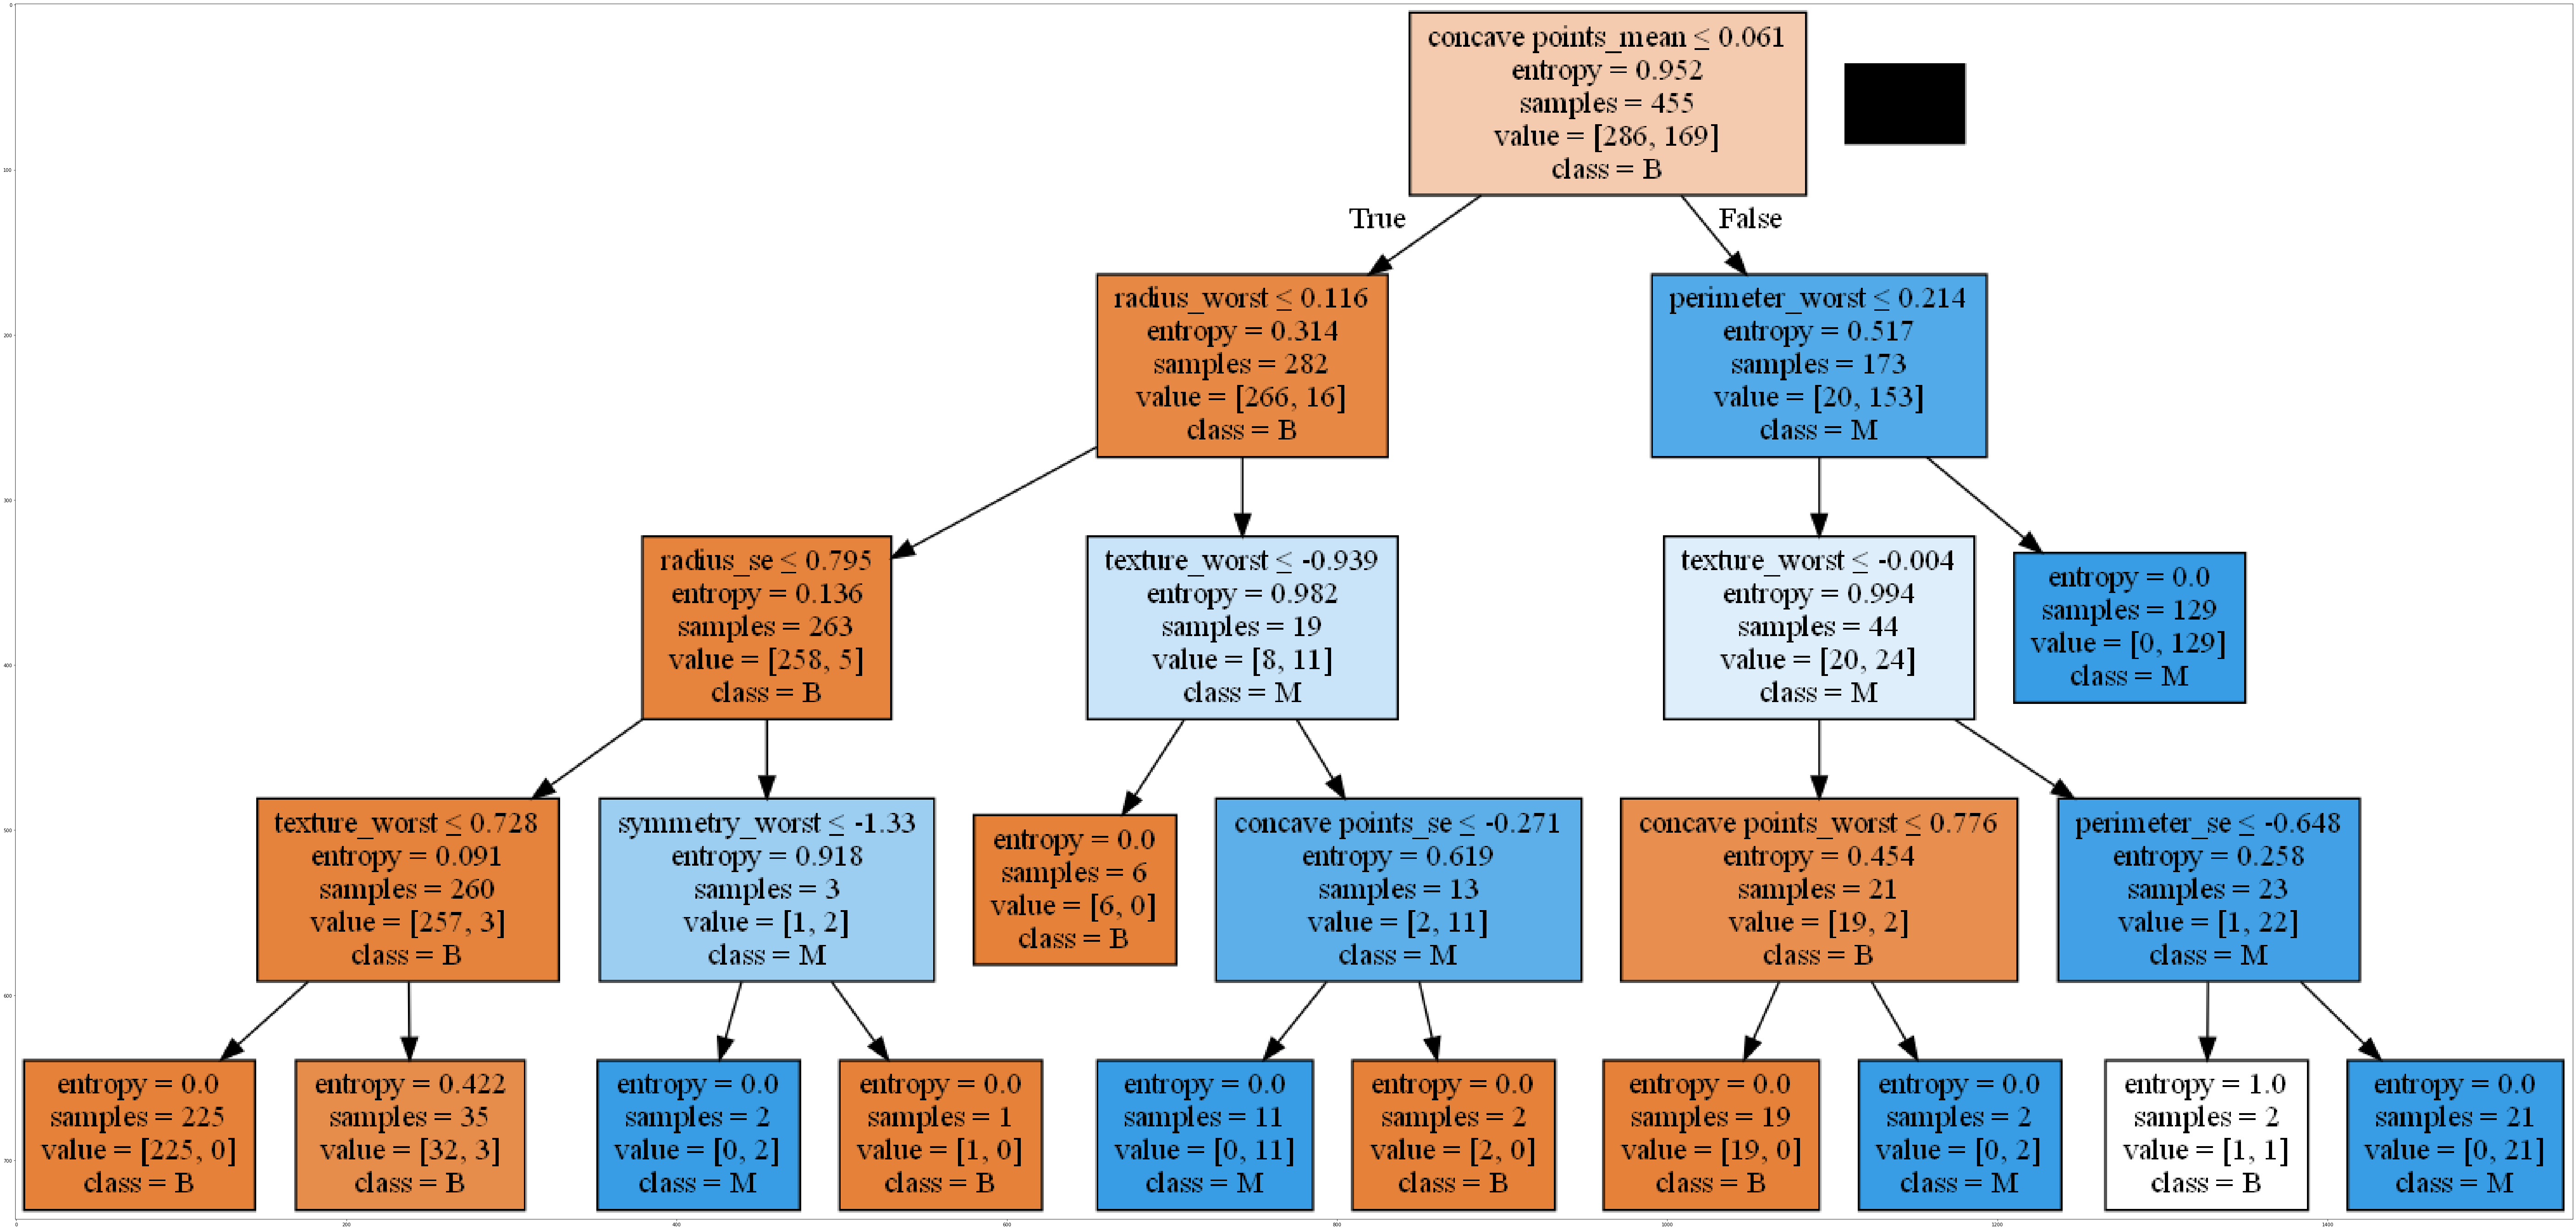

In [58]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df2.columns[1:31]
targetNames = df2["diagnosis"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train).astype(str), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')


In [59]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on test set
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [60]:
# Support Vector Machine

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'sigmoid']}

# Create SVM model
svc = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Predict using best parameters
y_pred = grid_search.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


Best parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best score:  0.9758241758241759
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [62]:
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support

# Train SVM Classifier
clf = svm.SVC(C=0.1, gamma=0.1, kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [63]:
# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test)

# Evaluate model performance
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [65]:
# gaussian nb

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Train Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on test set
y_pred = gnb.predict(X_test)

# Evaluate model performance
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [67]:
# neural network

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define parameter grid for GridSearchCV
param_grid = {'hidden_layer_sizes': [(10,), (20,), (30,), (10,10), (20,20), (30,30)]}

# Train neural network classifier with GridSearchCV
mlp = MLPClassifier(max_iter=1000, random_state=42)
grid = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Print best parameters and accuracy score
print("Best parameters: ", grid.best_params_)
print("Accuracy score: ", grid.best_score_)

# Make predictions on test set using best model
best_mlp = grid.best_estimator_
y_pred = best_mlp.predict(X_test)

# Evaluate model performance
# Print classification report
print(classification_report(y_test, y_pred))

Best parameters:  {'hidden_layer_sizes': (30,)}
Accuracy score:  0.9802197802197803
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        71
           M       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Train neural network classifier with 1 hidden layer containing 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on test set
y_pred = mlp.predict(X_test)

# Evaluate model performance
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.99      0.99      0.99        71
           M       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



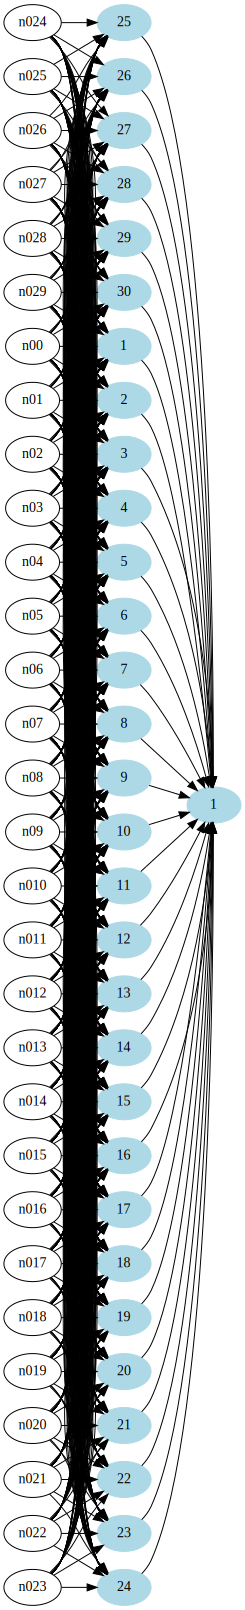

In [70]:
# Visualize neural network with graphviz
from graphviz import Source
layer_sizes = [X.shape[1]] + list(mlp.hidden_layer_sizes) + [mlp.n_outputs_]
layer_sizes = np.array(layer_sizes)

dot_data = "digraph {rankdir=LR;"
for i, size in enumerate(layer_sizes):
    if i == 0:
        continue
    for j in range(size):
        dot_data += "n{}{} [label=\"{}\", style=filled, color=lightblue];\n".format(i, j, j+1)

for i in range(1, len(layer_sizes)):
    for j in range(layer_sizes[i-1]):
        for k in range(layer_sizes[i]):
            dot_data += "n{}{} -> n{}{};\n".format(i-1, j, i, k)

dot_data += "}"

Source(dot_data)

In [71]:
#batas pca

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

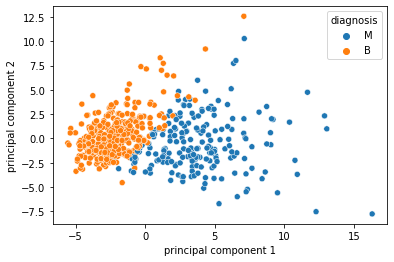

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df2.drop('diagnosis', axis=1))

# Perform PCA with n_components = 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Concatenate with target
finalDf2 = pd.concat([principalDf, df2[['diagnosis']]], axis=1)

# Visualize result
import seaborn as sns
sns.scatterplot(x='principal component 1', y='principal component 2', hue='diagnosis', data=finalDf2)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, df2['diagnosis'], test_size=0.2, random_state=42)

In [76]:
#knn dengan pca
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Menampilkan classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Train Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on test set
y_pred = gnb.predict(X_test)

# Print classification report to evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           B       0.93      0.99      0.96        71
           M       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'sigmoid']}

# Create SVM model
svc = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Predict using best parameters
y_pred = grid_search.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best score:  0.9362637362637363
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        71
           M       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [79]:
# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [80]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on test set
y_pred = dt.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [81]:
#neural network pca
# Train neural network classifier with 1 hidden layer containing 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(30,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on test set
y_pred = mlp.predict(X_test)

# Evaluate model performance
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.99      1.00      0.99        71
           M       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# yang bawah oret oretan saja

In [ ]:
print("X train dimensions : {}".format(X_train.shape))
print("X test dimensions : {}".format(X_test.shape))
print("y train dimensions : {}".format(y_train.shape))
print("y test dimensions : {}".format(y_test.shape))

In [ ]:
training_acc = clf2.score(X_train, y_train)
test_acc = clf2.score(X_test, y_test)
training_acc, test_acc

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
#import confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix

#accuracy
confm_knn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(confm_knn)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy knn : {}".format(accuracy_score(y_test, y_pred)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9473684210526315


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features) 

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.9590643274853801
Precision: 0.9574578277596922
Recall: 0.9543650793650793
F1 score: 0.9558709677419355


In [31]:
#gaussian naive bayes
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features) 

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on test set
y_pred = gnb.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.935672514619883
Precision: 0.9321544835750222
Recall: 0.9292328042328042
F1 score: 0.9306543778801843


In [32]:
#Random Forest Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

#Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

#Train Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

#Make predictions on test set
y_pred = rfc.predict(X_test)

#Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.9707602339181286
Precision: 0.9736486486486486
Recall: 0.9636243386243386
F1 score: 0.9682592716338123


In [33]:
# Decision Tree Classifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

# Train Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Make predictions on test set
y_pred = dtc.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.9415204678362573
Precision: 0.9333381171067738
Recall: 0.9437830687830688
F1 score: 0.9379535558780842


In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

# Train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on test set
y_pred = mlp.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.9766081871345029
Precision: 0.9748677248677249
Recall: 0.9748677248677249
F1 score: 0.9748677248677249


In [35]:
#batas pca

In [36]:
#bataspca

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

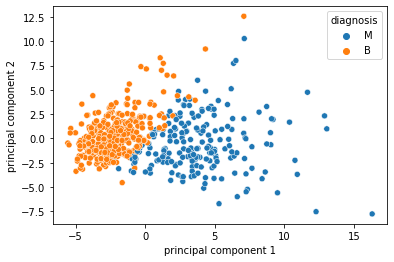

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Perform PCA with n_components = 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Concatenate with target
finalDf = pd.concat([principalDf, df2[['diagnosis']]], axis=1)

# Visualize result
import seaborn as sns
sns.scatterplot(x='principal component 1', y='principal component 2', hue='diagnosis', data=finalDf)


In [38]:
# knn pca
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Standardize the data
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)

# Fit the PCA model on the standardized data
pca = PCA(n_components=2)
pca.fit(scaled_features)

# Transform the data using the fitted PCA model
pca_features = pca.transform(scaled_features)

# Split the transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca_features, target, test_size=0.3, random_state=42)

# Train the KNN model on the transformed train set
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# Make predictions on the transformed test set
y_pred_pca = knn_pca.predict(X_test_pca)

# Evaluate the model performance on the transformed test set
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='macro')
recall_pca = recall_score(y_test, y_pred_pca, average='macro')
f1_pca = f1_score(y_test, y_pred_pca, average='macro')
print('Accuracy (with PCA):', accuracy_pca)
print('Precision (with PCA):', precision_pca)
print('Recall (with PCA):', recall_pca)
print('f1 score (with PCA):', f1_pca)


Accuracy (with PCA): 0.9415204678362573
Precision (with PCA): 0.9349782293178519
Recall (with PCA): 0.9404761904761905
f1 score (with PCA): 0.9375730140186915


In [39]:
# gaussian naive bayes pca
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

#Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#Fit the PCA model on the standardized data
pca = PCA(n_components=2)
pca.fit(scaled_features)

#Transform the data using the fitted PCA model
pca_features = pca.transform(scaled_features)

#Split the transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca_features, target, test_size=0.3, random_state=42)

#Train the Gaussian Naive Bayes model on the transformed train set
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train)

#Make predictions on the transformed test set
y_pred_pca = gnb_pca.predict(X_test_pca)

#Evaluate the model performance on the transformed test set
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='macro')
recall_pca = recall_score(y_test, y_pred_pca, average='macro')
f1_pca = f1_score(y_test, y_pred_pca, average='macro')
print('Accuracy (with PCA):', accuracy_pca)
print('Precision (with PCA):', precision_pca)
print('Recall (with PCA):', recall_pca)
print('f1 score (with PCA):', f1_pca)

Accuracy (with PCA): 0.9181286549707602
Precision (with PCA): 0.9144560357675111
Recall (with PCA): 0.9087301587301587
f1 score (with PCA): 0.9114382953536551


In [40]:
# Random forest pca
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the PCA model on the standardized data
pca = PCA(n_components=2)
pca.fit(scaled_features)

# Transform the data using the fitted PCA model
pca_features = pca.transform(scaled_features)

# Split the transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca_features, target, test_size=0.3, random_state=42)

# Train Random Forest Classifier on the transformed train set
rfc_pca = RandomForestClassifier(random_state=42)
rfc_pca.fit(X_train_pca, y_train)

# Make predictions on the transformed test set
y_pred_pca = rfc_pca.predict(X_test_pca)

# Evaluate the model performance on the transformed test set
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='macro')
recall_pca = recall_score(y_test, y_pred_pca, average='macro')
f1_pca = f1_score(y_test, y_pred_pca, average='macro')
print('Accuracy (with PCA):', accuracy_pca)
print('Precision (with PCA):', precision_pca)
print('Recall (with PCA):', recall_pca)
print('f1 score (with PCA):', f1_pca)


Accuracy (with PCA): 0.9532163742690059
Precision (with PCA): 0.9497354497354498
Recall (with PCA): 0.9497354497354498
f1 score (with PCA): 0.9497354497354498


In [41]:
# Decision tree pca
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Standardize the data
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

# Fit the PCA model on the standardized data
pca = PCA(n_components=2)
pca.fit(scaled_features)

# Transform the data using the fitted PCA model
pca_features = pca.transform(scaled_features)

# Split the transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca_features, target, test_size=0.3, random_state=42)

# Train the Decision Tree model on the transformed train set
dtc_pca = DecisionTreeClassifier(random_state=42)
dtc_pca.fit(X_train_pca, y_train)

# Make predictions on the transformed test set
y_pred_pca = dtc_pca.predict(X_test_pca)

# Evaluate the model performance on the transformed test set
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='macro')
recall_pca = recall_score(y_test, y_pred_pca, average='macro')
f1_pca = f1_score(y_test, y_pred_pca, average='macro')

print('Accuracy (with PCA):', accuracy_pca)
print('Precision (with PCA):', precision_pca)
print('Recall (with PCA):', recall_pca)
print('F1 score (with PCA):', f1_pca)


Accuracy (with PCA): 0.9181286549707602
Precision (with PCA): 0.907928388746803
Recall (with PCA): 0.921957671957672
F1 score (with PCA): 0.9136363636363636


In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Fit the PCA model on the standardized data
pca = PCA(n_components=2)
pca.fit(scaled_features)

# Transform the data using the fitted PCA model
pca_features = pca.transform(scaled_features)

# Split the transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca_features, target, test_size=0.3, random_state=42)

# Train the MLP model on the transformed train set
mlp_pca = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp_pca.fit(X_train_pca, y_train)

# Make predictions on the transformed test set
y_pred_pca = mlp_pca.predict(X_test_pca)

# Evaluate the model performance on the transformed test set
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='macro')
recall_pca = recall_score(y_test, y_pred_pca, average='macro')
f1_pca = f1_score(y_test, y_pred_pca, average='macro')

print('Accuracy (with PCA):', accuracy_pca)
print('Precision (with PCA):', precision_pca)
print('Recall (with PCA):', recall_pca)
print('F1 score (with PCA):', f1_pca)


Accuracy (with PCA): 0.9649122807017544
Precision (with PCA): 0.965424739195231
Recall (with PCA): 0.9589947089947091
F1 score (with PCA): 0.962044983722995


In [43]:
target.keys()

RangeIndex(start=0, stop=569, step=1)

In [ ]:
features.keys()

# Tidak digunakan hanya oret oretan

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Perform PCA with n_components = 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# Create new dataframe with principal components and target
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Outcome']]], axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(finalDf.drop('Outcome', axis=1), finalDf['Outcome'], test_size=0.2, random_state=42)

# Train Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on test set
y_pred = gnb.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
